In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Dataloader import Dataloader
from RamdomForest import RamdomForest
from score import score
from sklearn.utils import shuffle
from IPython.display import display, HTML
from datetime import date
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
parm = {
    'learning_rate' : 0.01,
    'n_estimators' : 5000,
    'max_depth' : [32],
    'num_leaves' : [256],
    'feature_fraction' : [0.9]
}

In [3]:
dataloader = Dataloader()
X_train, X_test, y_train, y_test = dataloader.prepare_train_data(df)
points = []

In [4]:
for i in [0.1,1,10,20,40,50,100]:
    ramdom_forest = RamdomForest()
    model = ramdom_forest.train_LGBM(X_train, y_train, X_test, y_test,parm,reg_alpha = 5,reg_lambda = i)
    y, y_true= model.predict(X_test,y_test)
    hit_rate,point = score(y,y_true)
    points.append(point)

/home/mmdb/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['III_index', 'II_index', 'IV_index', 'IX_index', 'I_index', 'VIII_index', 'VII_index', 'VI_index', 'V_index', 'XIII_index', 'XII_index', 'XIV_index', 'XI_index', 'X_index', 'bachelor_rate', 'born_rate', 'building_material', 'building_type', 'building_use', 'city_town', 'death_rate', 'divorce_rate', 'elementary_rate', 'highschool_rate', 'jobschool_rate', 'junior_rate', 'marriage_rate', 'master_rate', 'parking_price_isna', 'parking_way', 'txn_floor_isna']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[5000]	training's l1: 18480.1	training's rmse: 30325.9	valid_1's l1: 130293	valid_1's rmse: 276784
Finished.
depth : 32 leaves : 256 fraction :0.9
first part : 5609.572420717932 last part: 0.8705228043086359
> 20 % : 0.19630156472261737
[5000]	training's l1: 19148.4	training's rmse: 31194.6	valid_1's l1: 130339	valid_1's rmse: 278024
Finished.
depth : 32 leaves : 256 fraction :0.9
first part : 5602.041670153125 last part: 0.8704272673665318
> 20 % : 0.19655258974144424
[5000]	training's l1: 23662.2	training's rmse: 37788.2	valid_1's l1: 131260	valid_1's rmse: 279003
Finished.
depth : 32 leaves : 256 fraction :0.9
first part : 5583.633168772487 last part: 0.8696981246360295
> 20 % : 0.19605053970379047
[5000]	training's l1: 26948.9	training's rmse: 42843.9	valid_1's l1: 131142	valid_1's rmse: 278086
Finished.
depth : 32 leaves : 256 fraction :0.9
first part : 5543.469165760188 last part: 0.8692646869452632
> 20 % : 0.19605053970379047
[5000]	training's l1: 31344.7	training's rmse: 50212

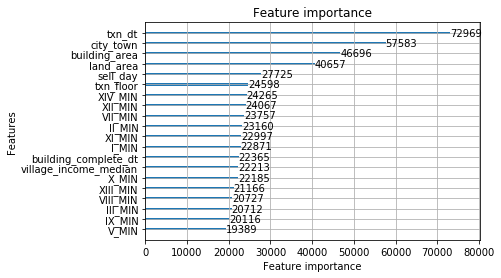

In [5]:
ax = model.plot_feature_important()

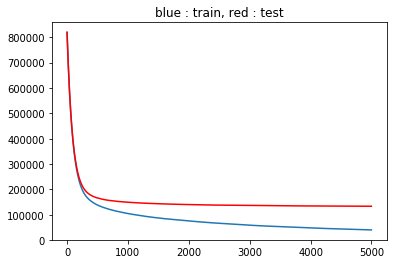

In [6]:
model.plot_loss()

In [7]:
y, y_true= model.predict(X_train,y_train)
hit_rate,point = score(y,y_true)
print(hit_rate)

first part : 8301.15264732339 last part: 0.9430339327735886
> 20 % : 0.03830303537434889
0.830115264732339


In [8]:
y, y_true= model.predict(X_test,y_test)
hit_rate,point = score(y,y_true)

first part : 5479.039410927956 last part: 0.8660758766659991
> 20 % : 0.19989958999246926


In [9]:
hit_rate

0.5479039410927956

In [10]:
test_df = pd.read_csv("data/test.csv")
build_id = pd.read_csv("data/submit_test.csv")['building_id']
test_df = dataloader.prepare_test_data(test_df)
test_y, _= model.predict(test_df,y_test)
submit_df = pd.DataFrame(data={
    'building_id' : build_id,
    'total_price' : test_y
})
today = str(date.today())
submit_df.to_csv(f'submits/{today}_lightgbm.csv',index = False)

In [11]:
print(points)

[5610.442943522241, 5602.912097420492, 5584.502866897123, 5544.338430447133, 5510.030601858405, 5489.9466658685915, 5479.905486804622]
